In [1]:
# Importing signal data to Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

signal_data = pd.read_csv('D:/testapi/ml_testing/data/adc_50_data.csv', header = None)
signal_data

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,64,32768,1,1,512,0,1953125,12,0,0,...,3,3,1,1,4,0,-5,-5,-3,-1
1,64,32768,1,1,512,0,1953125,12,0,0,...,5,7,3,2,8,7,3,5,6,8
2,64,32768,1,1,512,0,1953125,12,0,0,...,5,7,3,2,8,7,3,5,6,8
3,64,32768,1,1,512,0,1953125,12,0,0,...,3,3,0,-1,-4,-5,-7,-8,-8,-7
4,64,32768,1,1,512,0,1953125,12,0,0,...,2,3,4,3,3,4,6,7,2,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,64,32768,1,1,512,0,1953125,12,0,0,...,-10,-8,-8,-9,-7,-5,-1,0,-5,-2
496,64,32768,1,1,512,0,1953125,12,0,0,...,32,32,30,32,27,25,29,29,29,29
497,64,32768,1,1,512,0,1953125,12,0,0,...,5,0,0,1,-1,-2,-4,-2,-3,-1
498,64,32768,1,1,512,0,1953125,12,0,0,...,-12,-15,-16,-13,-12,-12,-6,-5,-5,-4


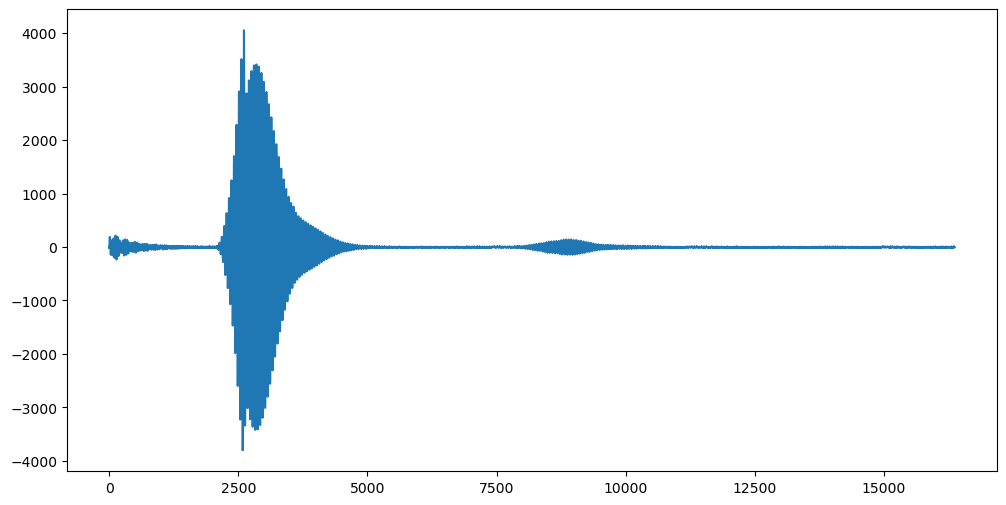

In [2]:
# Loading signal data to data frame

df = pd.DataFrame(signal_data)

# Taking signal number as input from the user

signal_number = int(input("Enter the signal number: "))
input_signal = df.iloc[signal_number].to_numpy()

# Drop the first 16 values from the row
real_signal = input_signal[16:]

# Plot the data
plt.figure(figsize=(12,6))
plt.plot(real_signal)
plt.show()

In [3]:
# Split the signal into windows of 300 samples
window_size = 300

# Initialize an empty list to store the windows
windows = []


# Loop through the signal and create windows
for i in range(0, len(real_signal), window_size):
    window = real_signal[i:i+window_size]
    windows.append(window)


# Create a dictionary of windows
window_dict = {'W' + str(i+1): window for i, window in enumerate(windows)}
window_dict

{'W1': array([-9, -9, -10, -8, -19, 23, 60, 95, 128, 143, 156, 170, 180, 182,
        186, 189, 173, 148, 124, 100, 80, 61, 40, 11, -20, -54, -86, -108,
        -118, -129, -130, -137, -135, -140, -134, -120, -105, -80, -56,
        -31, -10, 8, 27, 43, 61, 83, 106, 119, 123, 125, 116, 110, 99, 85,
        70, 49, 24, -1, -26, -44, -61, -78, -96, -118, -137, -149, -157,
        -152, -142, -131, -122, -111, -100, -82, -54, -29, 0, 30, 60, 84,
        102, 119, 133, 146, 157, 160, 160, 151, 137, 124, 107, 98, 74, 43,
        9, -29, -63, -89, -112, -128, -147, -162, -184, -196, -203, -199,
        -190, -177, -158, -133, -108, -89, -63, -33, 2, 42, 77, 109, 134,
        154, 177, 192, 205, 214, 214, 208, 200, 183, 167, 145, 122, 93, 56,
        14, -28, -64, -97, -123, -146, -166, -191, -213, -225, -232, -233,
        -220, -212, -193, -173, -148, -125, -100, -69, -31, 2, 38, 68, 93,
        116, 134, 154, 168, 182, 189, 186, 179, 168, 151, 134, 116, 90, 63,
        32, 0, -33, -57, -80

In [4]:
import os

# Create a folder to store the spectrograms temporarily
folder_name = "spectrogram_check"

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

folder_name

'spectrogram_check'

C:\Users\Anurag\AppData\Local\Temp\ipykernel_23136\2445932549.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 6))
C:\Users\Anurag\AppData\Local\Temp\ipykernel_23136\2445932549.py:6: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=168).
  ax.specgram(value, Fs=1024, mode='psd', scale='dB', cmap='gray')


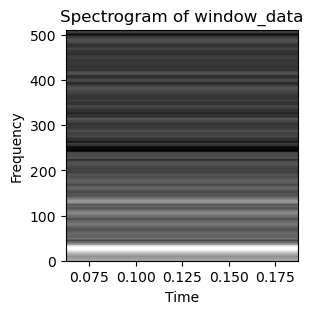

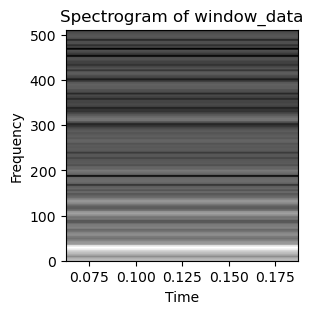

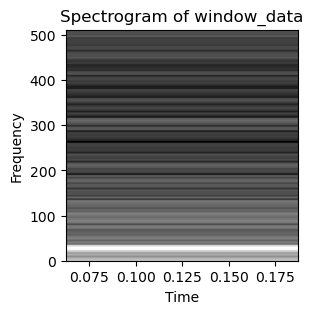

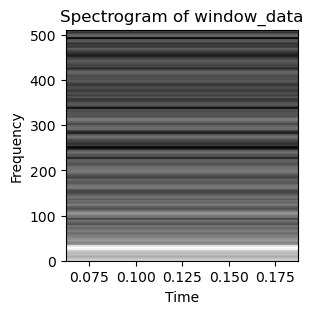

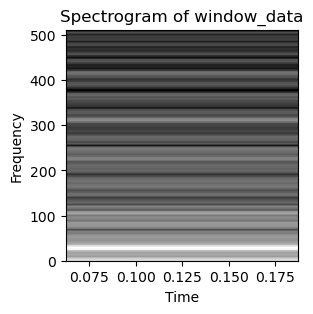

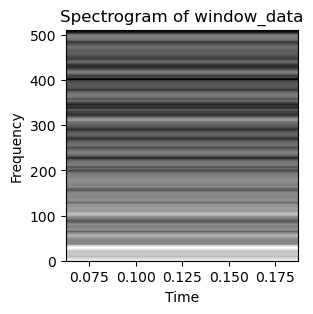

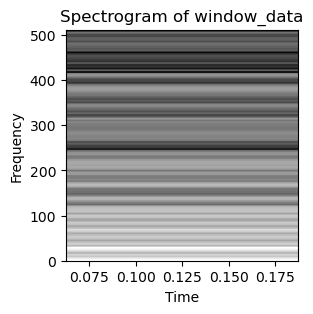

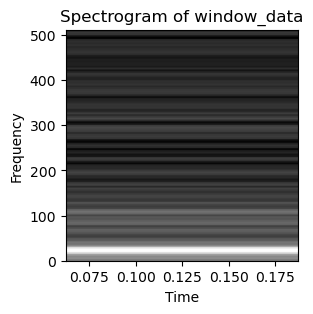

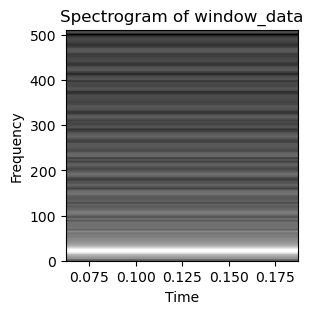

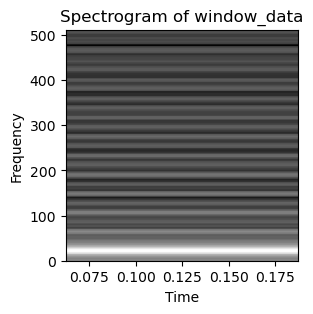

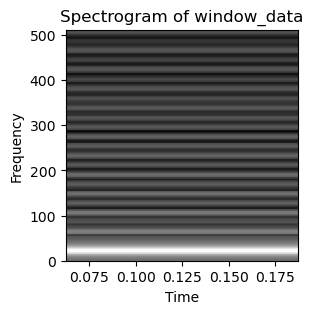

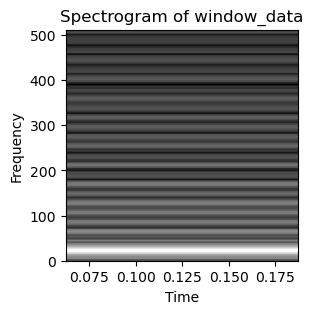

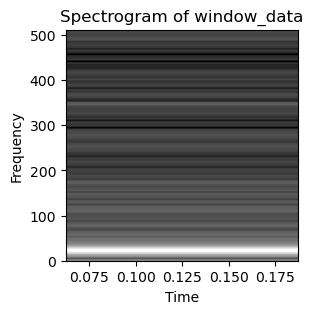

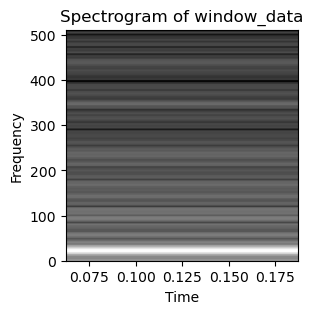

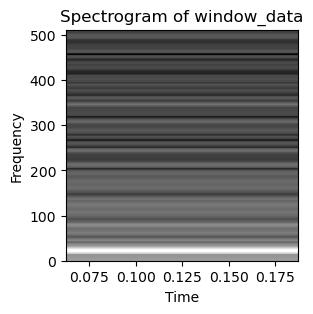

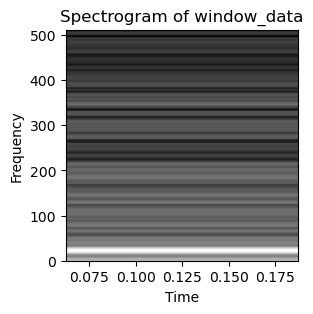

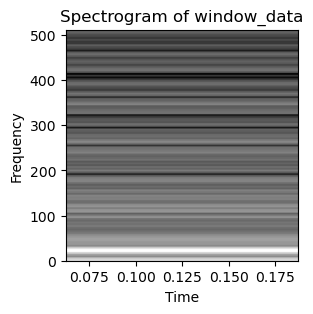

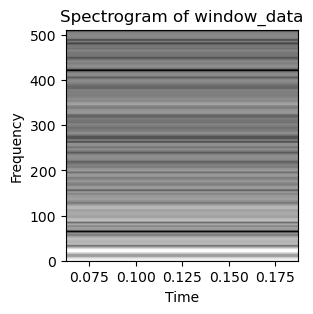

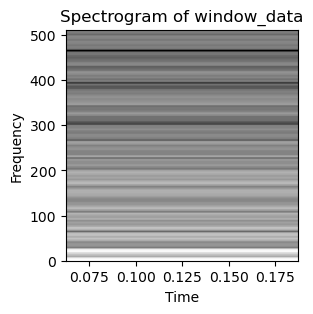

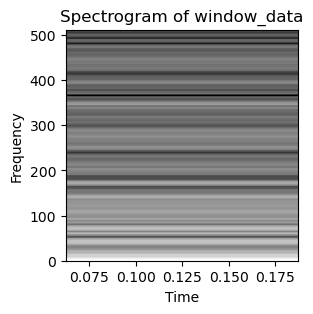

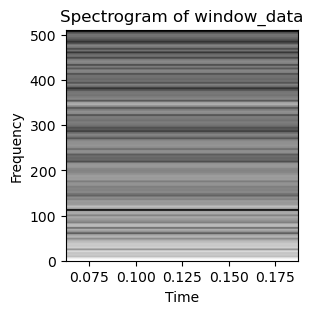

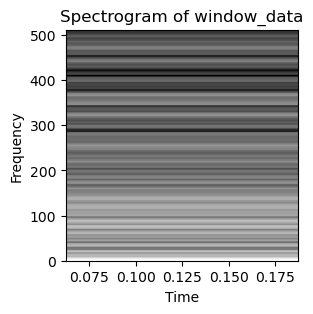

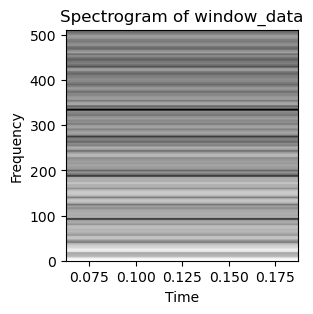

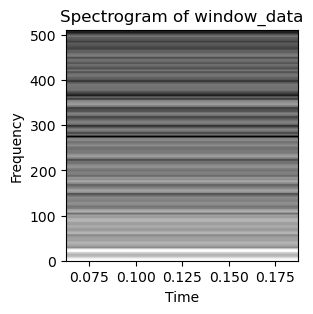

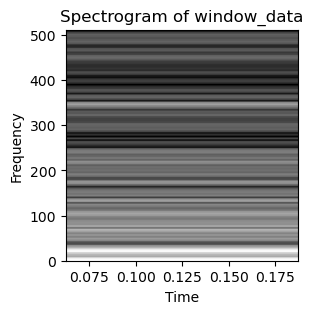

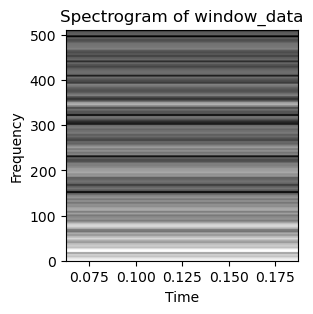

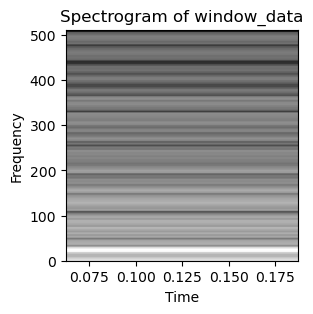

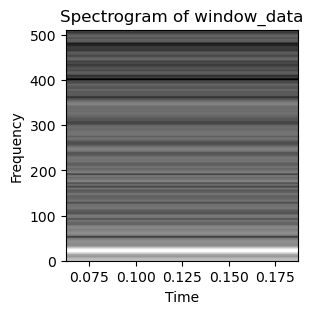

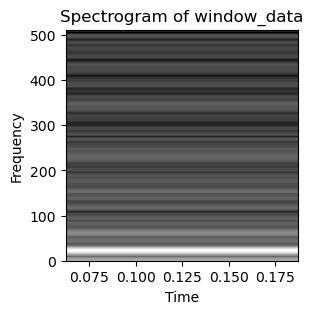

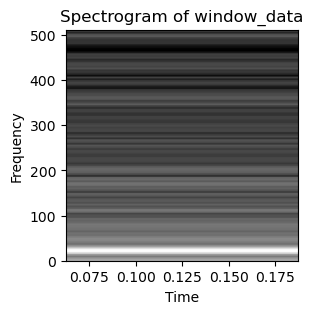

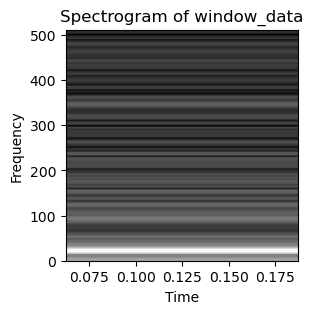

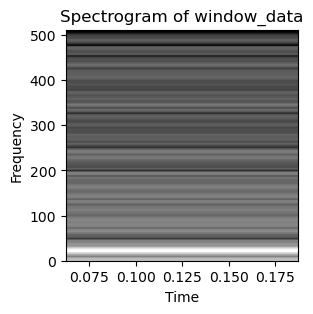

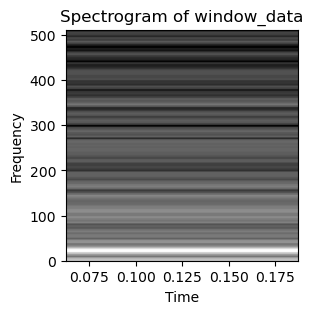

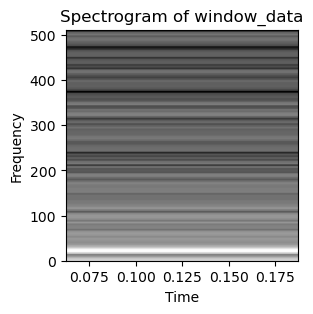

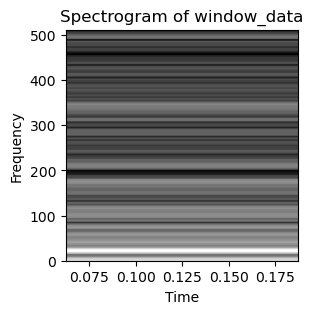

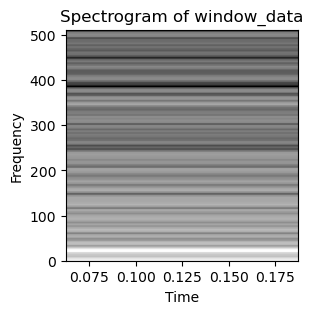

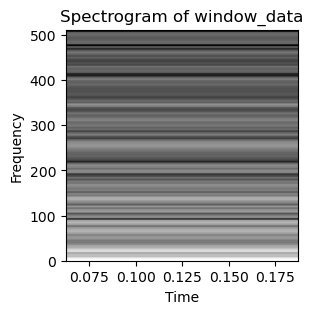

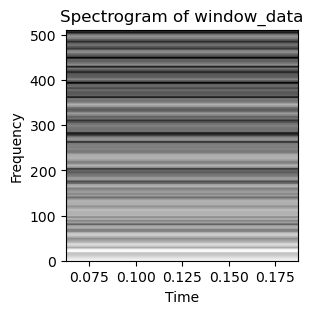

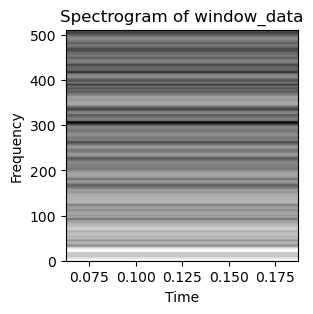

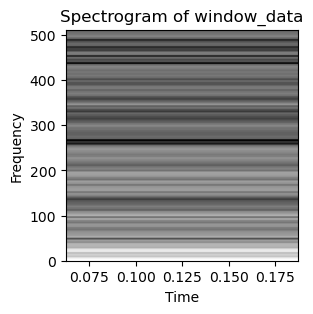

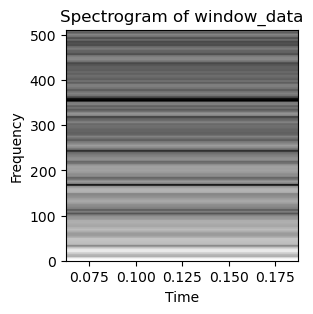

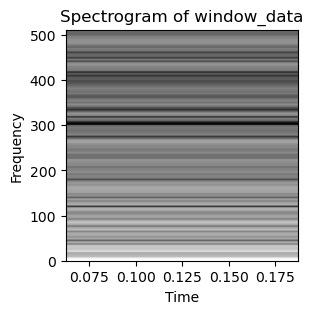

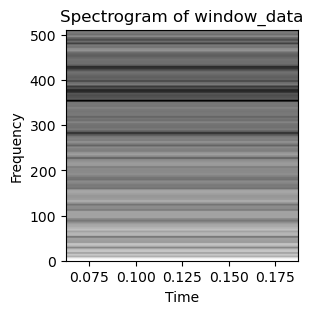

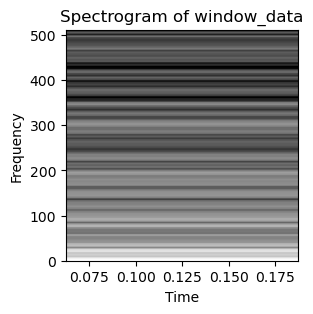

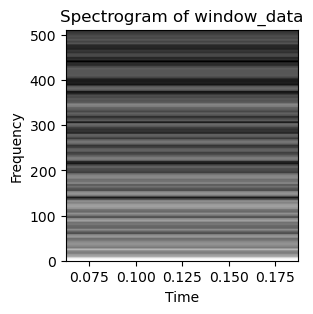

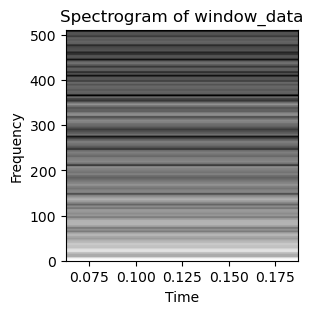

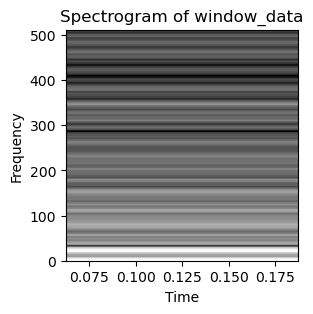

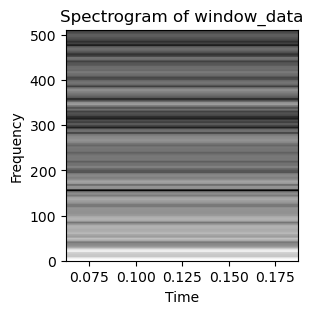

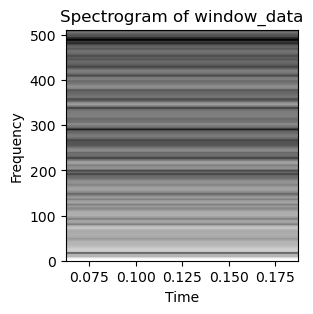

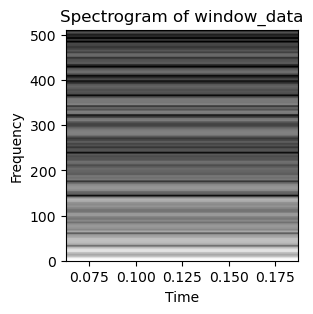

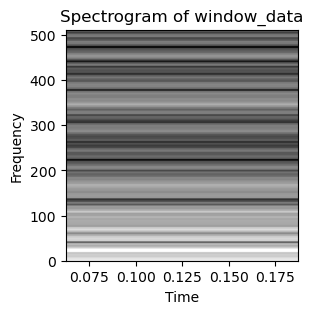

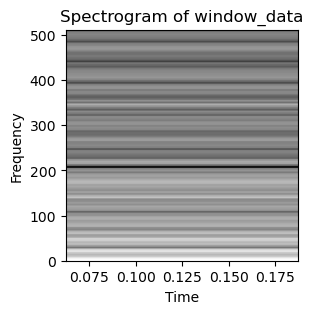

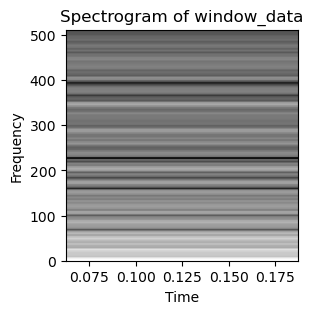

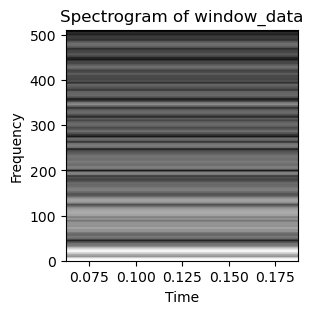

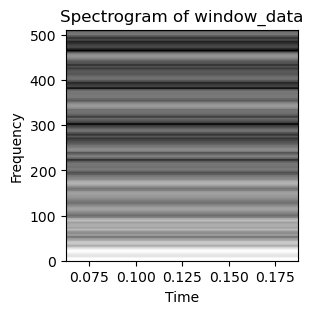

In [5]:
# Plot the spectrogram of each window and save it to the folder
# We will use this spectrograms to find peak using our model
for key, value in window_dict.items():
    # Generate spectrogram
    # We are saving spectrogram images wih 300x300 pixels size and grayscale colormap
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.specgram(value, Fs=1024, mode='psd', scale='dB', cmap='gray')

    # Set labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_title('Spectrogram of window_data')

    # Set the figure size to 300x300
    fig.set_size_inches(3, 3)
    
    # Save the spectrogram image to the folder with a unique filename
    filename = f'spectrogram_{key}.png'
    save_path = os.path.join(folder_name, filename)
    plt.savefig(save_path)

In [6]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_trained_model.h5')

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the image directory
image_directory = folder_name

# Initialize variables to keep track of the image with the highest prediction value
max_prediction = 0
max_image_name = None

# Iterate over the images in the directory
for image_name in os.listdir(image_directory):
    # Load the image
    image_path = os.path.join(image_directory, image_name)
    image = load_img(image_path, color_mode='grayscale', target_size=(300, 300))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Make prediction
    prediction = loaded_model.predict(image)

    # If this prediction is the highest so far, update max_prediction and max_image_name
    if prediction[0][0] > max_prediction:
        max_prediction = prediction[0][0]
        max_image_name = image_name

# After all images have been processed, max_image_name will be the name of the image with the highest prediction value
# Extract the window number from the image name
window_number = max_image_name.split('_')[1].split('.')[0]

print(f"The image with the highest prediction value is {max_image_name} with a prediction value of {max_prediction}. The window number is {window_number}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━

In [8]:
# Values of the window which the model thinks has the highest peak
window_values = window_dict.get(window_number)

# Get the peak value from the values of the window which the model thinks has the highest peak
result_peak = np.max(window_values)
result_peak

3415

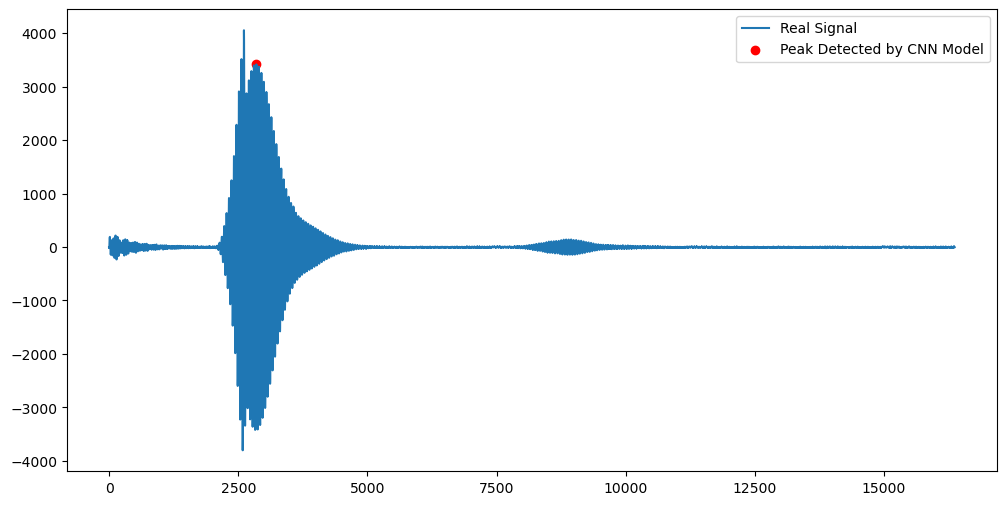

In [9]:
# Plot the real signal and the peak detected by the model
plt.figure(figsize=(12, 6))

# Find indices where result_peak is present in real_signal
result_peak_indices = np.where(real_signal == result_peak)[0]
plt.plot(real_signal)

# Plot result_peak indices
plt.scatter(result_peak_indices, real_signal[result_peak_indices], color='red')

# Add legend
plt.legend(['Real Signal', 'Peak Detected by CNN Model'])

# Show the plot
plt.show()

In [10]:
import shutil

# Delete the temporary folder
Y = input("Are you sure you want to delete the folder? (Y/N): ")
if Y == "Y":
    shutil.rmtree(folder_name)
    print("Folder deleted successfully.")
else:
    print("Deletion cancelled.")


Folder deleted successfully.
